In [ ]:
import os, math
from slicing_inference import sahi_slicing_inference
from inference_modular import ship_detection
from PIL import Image 
import numpy as np
from imageutils import resize_img
import torch

In [ ]:
image_path=r"D:\NLP 1\Sat_object_detection\debug_images\2.jpg"
image_path=r"D:\NLP 1\Sat_object_detection\inference_images\dd4ffcb5c.jpg"
images_path = r"D:\NLP 1\Sat_object_detection\inference_images"
images_path = r"D:\NLP 1\Sat_object_detection\debug_images_2"

Directory mode

In [14]:
from inference_modular import ship_detection

# images_dir = r"D:\NLP 1\Sat_object_detection\debug_images_2"
# images_dir = r"D:\NLP 1\Sat_object_detection\debug_images_3"
# images_dir = r"D:\NLP 1\Sat_object_detection\inference_images"
images_dir = r"D:\NLP 1\Sat_object_detection\ship"

coord = {"0c0d90d8d.jpg": [58.4893887115, 23.6396684794, 58.4961460224, 23.6487324542],
         "2d1b074cb.jpg": [47.3562147890, 26.3220918742, 47.3646843251, 26.3311658917],}

result = ship_detection(images=images_dir, bbox_coord_wgs84=coord, annotations=["length", "coord"], nms_iou_threshold=0.15, scale_down_factor= "adaptive",
                        adaptive_scale_down_parameters = {'a': 0.1, 'b': 0.2, 'threshold': 1.5}, model_input_dim=768, confidence_threshold=0.9, sahi_overlap_ratio=0.33,
                        output_annotated_image=True, save_annotated_image=True, annotation_font_size=17, annotation_bbox_width=3, output_original_image=True)

Processing 1.png
Performing prediction on 2 number of slices.
4 bboxes found in 1.png
Processing 10.png
Performing prediction on 4 number of slices.
2 bboxes found in 10.png
Processing 100.png
Performing prediction on 6 number of slices.
2 bboxes found in 100.png
Processing 101.png
Performing prediction on 4 number of slices.
2 bboxes found in 101.png
Processing 102.png
Performing prediction on 1 number of slices.
1 bboxes found in 102.png
Processing 103.png
Performing prediction on 6 number of slices.
9 bboxes found in 103.png
Processing 104.png
Performing prediction on 2 number of slices.
4 bboxes found in 104.png
Processing 105.png
Performing prediction on 2 number of slices.
14 bboxes found in 105.png
Processing 106.png
Performing prediction on 6 number of slices.
16 bboxes found in 106.png
Processing 107.png
Performing prediction on 3 number of slices.
2 bboxes found in 107.png
Processing 108.png
Performing prediction on 8 number of slices.
10 bboxes found in 108.png
Processing 10

In [3]:
result["2d1b074cb.jpg"]

{'n_obj': 4,
 'bboxes': array([[623.48035, 235.7248 , 672.6443 , 348.84637],
        [356.6679 ,  23.62661, 412.32727, 103.08192],
        [311.4162 , 457.86655, 377.58044, 535.9262 ],
        [649.2584 , 724.242  , 689.8866 , 768.     ]], dtype=float32),
 'scores': array([0.999728  , 0.99943763, 0.99943274, 0.997042  ], dtype=float32),
 'original_image': <PIL.Image.Image image mode=RGB size=768x768>,
 'ships_long_lat': [(47.363361647318, 26.325545265476),
  (47.360455044484, 26.322840412864),
  (47.360013930889, 26.327962767803),
  (47.363598862624, 26.330907388203)],
 'ships_lengths': [158.1, 121.0, 125.7, 72.8],
 'ships_bbox_dimensions': [(148.6, 54.0),
  (104.4, 61.2),
  (102.6, 72.7),
  (57.5, 44.7)],
 'annotated_image': <PIL.Image.Image image mode=RGB size=768x768>}

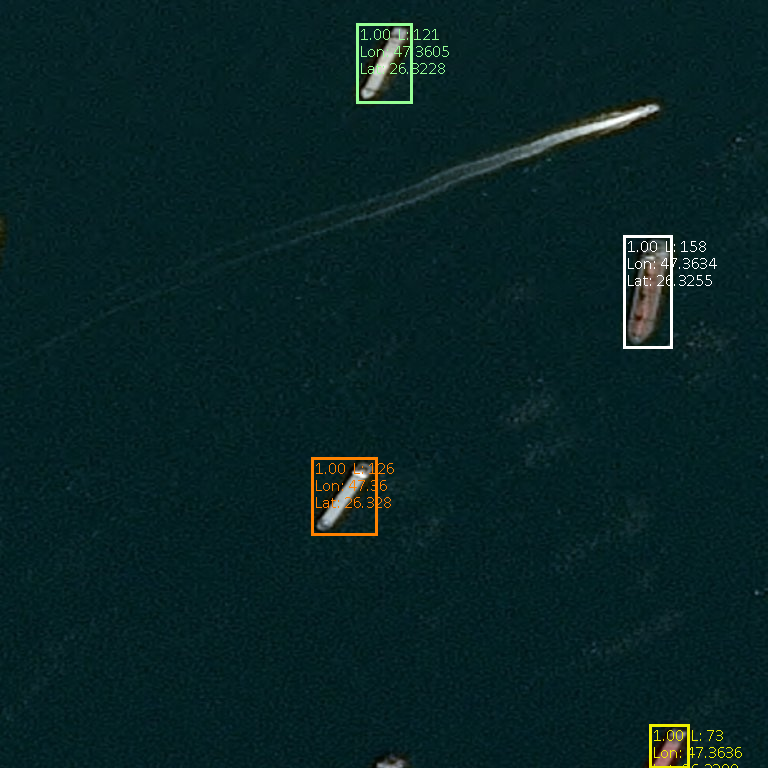

In [4]:
# result["2d1b074cb.jpg"]["original_image"]
result["2d1b074cb.jpg"]["annotated_image"]

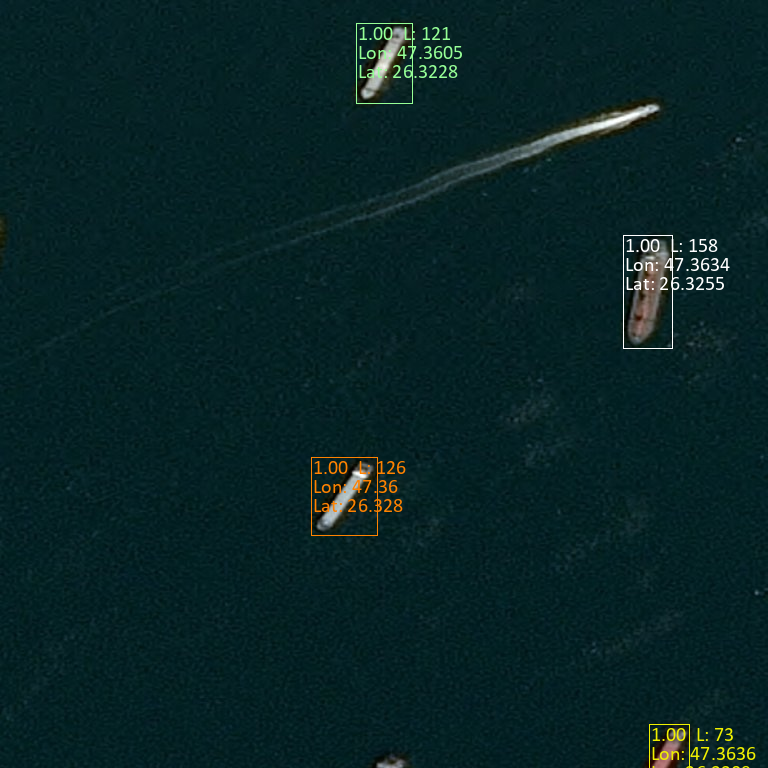

In [5]:
from imageutils import draw_bbox_torchvision

image = result["2d1b074cb.jpg"]
annotated_image = draw_bbox_torchvision(image=image["original_image"], bboxes=image["bboxes"], scores=image["scores"], lengths=image["ships_lengths"], 
                        ships_coords=image["ships_long_lat"], annotations=["score", "length", "coord"], save=False, image_save_name=r"C:\Users\user2\Desktop\b.jpg",
                        output_annotated_image=True, font_size=20, font=r"calibri.ttf", bbox_width=1)
annotated_image

In [ ]:
result["2d1b074cb.jpg"]["ships_long_lat"]

In [ ]:
result["dad047800.jpg"]

Images dictionary mode

In [6]:
from PIL import Image
images_paths = [r"D:\NLP 1\Sat_object_detection\inference_images\dd4ffcb5c.jpg",
                r"D:\NLP 1\Sat_object_detection\debug_images_2\2_2.jpg",
                r"D:\NLP 1\Sat_object_detection\debug_images_2\e0b6f0185.jpg"
                ]
coords = [[58.4893887115, 23.6396684794, 58.4961460224, 23.6487324542], 
          [47.3562147890, 26.3220918742, 47.3646843251, 26.3311658917],
          [62.5293887115, 18.9696684794, 62.5361460224, 18.9787324542],]
images_dict = {}
coords_dict = {}
for idx, img_path in enumerate(images_paths):
    img_name = "image{0:03}".format(idx+1)
    images_dict[img_name] = {}
    images_dict[img_name]['image'] = Image.open(img_path)

    coords_dict[img_name] = coords[idx]

print(images_dict)
print(coords_dict)


{'image001': {'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=768x768 at 0x2689E710810>}, 'image002': {'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4670x4670 at 0x2689E710990>}, 'image003': {'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=768x768 at 0x2689E710690>}}
{'image001': [58.4893887115, 23.6396684794, 58.4961460224, 23.6487324542], 'image002': [47.356214789, 26.3220918742, 47.3646843251, 26.3311658917], 'image003': [62.5293887115, 18.9696684794, 62.5361460224, 18.9787324542]}


In [7]:
from inference_modular import ship_detection
result = ship_detection(images=images_dict, bbox_coord_wgs84=coords_dict)

Processing image001
Performing prediction on 1 number of slices.
3 bboxes found in image001
Processing image002
Performing prediction on 25 number of slices.
12 bboxes found in image002
Processing image003
Performing prediction on 1 number of slices.
5 bboxes found in image003


In [8]:
result['image001']

{'n_obj': 3,
 'bboxes': array([[ 73.13797 , 639.82117 , 124.770706, 741.1826  ],
        [ 37.490547, 137.97885 ,  99.83393 , 229.94489 ],
        [579.8303  , 552.79254 , 610.90784 , 606.02045 ]], dtype=float32),
 'scores': array([0.99949455, 0.9990532 , 0.99712497], dtype=float32),
 'ships_long_lat': [(58.490259369348, 23.647817817615),
  (58.489992841834, 23.641839606663),
  (58.494627115108, 23.646506664116)],
 'ships_lengths': [140.8, 133.0, 75.3],
 'ships_bbox_dimensions': [(133.0, 46.3), (120.7, 55.9), (69.9, 27.9)],
 'annotated_image': <PIL.Image.Image image mode=RGB size=768x768>}

In [10]:
result['image001']['ships_bbox_dimensions']

[(133.0, 46.3), (120.7, 55.9), (69.9, 27.9)]

Single image mode

In [ ]:
from inference_modular import ship_detection
from PIL import Image
# images_path = r"D:\NLP 1\Sat_object_detection\inference_images"
# images_path = r"D:\NLP 1\Sat_object_detection\debug_images_2\e7e24507a.jpg"
images_path = r"D:\NLP 1\Sat_object_detection\debug_images_3\2_2.jpg"
img = Image.open(images_path)
print(type(img))
coord = [58.4893887115,23.6396684794,58.4961460224,23.6487324542]

result = ship_detection(images=img, bbox_coord_wgs84=coord, annotations=["length", "coord"], nms_iou_threshold=0.15,scale_down_factor= "adaptive",
                        adaptive_scale_down_parameters = {'a': 0.3, 'b': 1, 'threshold': 1.5}, confidence_threshold=0.9, sahi_overlap_ratio=0.33,
                        output_annotated_image=True, save_annotated_image=False, output_original_image=True)

In [ ]:
result.keys()

In [ ]:
result["annotated_image"]
# result["original_image"]

In [ ]:
from imageutils import draw_bbox_torchvision

image = result
annotated_image = draw_bbox_torchvision(image=image["original_image"], bboxes=image["bboxes"], scores=image["scores"], lengths=image["ships_lengths"], 
                        ships_coords=image["ships_long_lat"], annotations=["score", "length", "coord"], save=False, image_save_name=r"C:\Users\user2\Desktop\b.jpg",
                        output_annotated_image=True, font_size=20, font=r"calibri.ttf", bbox_width=2)
annotated_image

Use draw_bbox_torchvision separately

In [ ]:
from imageutils import draw_bbox_torchvision
annotated_image = draw_bbox_torchvision(image=result["original_image"], bboxes=result["bboxes"], scores=result["scores"], lengths=result["ships_length"], 
                        ships_coords=result["ships_long_lat"], annotations=["score"], save=True, image_save_name=r"C:\Users\user2\Desktop\b.jpg", output_annotated_image=True)
annotated_image

Drafts

In [ ]:
images_names = ["Image{0:03}".format(i) for i in range(100)]
images = [i for i in range(100)]

images_dict = {images_names[i]:{"image": images[i]} for i in range(len(images_names))}
images_dict

In [ ]:
from scipy.optimize import curve_fit
def func(x, a, b, c):
    return (a * x**2 + b*x + c) # a and d are redundant

dim_c =  [2   , 3   ,  4   , 5   , 6  , 7   ,  8  ,  9  , 10 , ]
dim_c2 = [1.2 , 1.4 , 1.6  , 1.8 , 2  , 2.2 , 2.4 , 2.6 ,  3 , ]
p , _ = curve_fit(func, dim_c, dim_c2)

In [ ]:
print(f"y = {p[0]:.2f}x**2 + {p[1]:.2f}*x + {p[2]:.2f}")